In [1]:
import healpy as hp 
import pandas as pd
import pymaster as nmt
import matplotlib.pyplot as plt
import numpy as np

path = '/vol/aleph/data/mheld/salmo/SALMO_simulations/highVD_1024/methods_deprojection/'

nside = 1024
nbands = 8
delta_ell = 16
lmax_filts = 2*nside    ## up to which l do you want the filters
dell = lmax_filts // nbands

bins = nmt.NmtBin.from_nside_linear(nside, delta_ell)


savefigs = True
pathFIGS = '../figs_thesis/methods_deprojection/'

results = pd.read_csv(f'{path}mean_cross_terms.data')

Nsim = 100

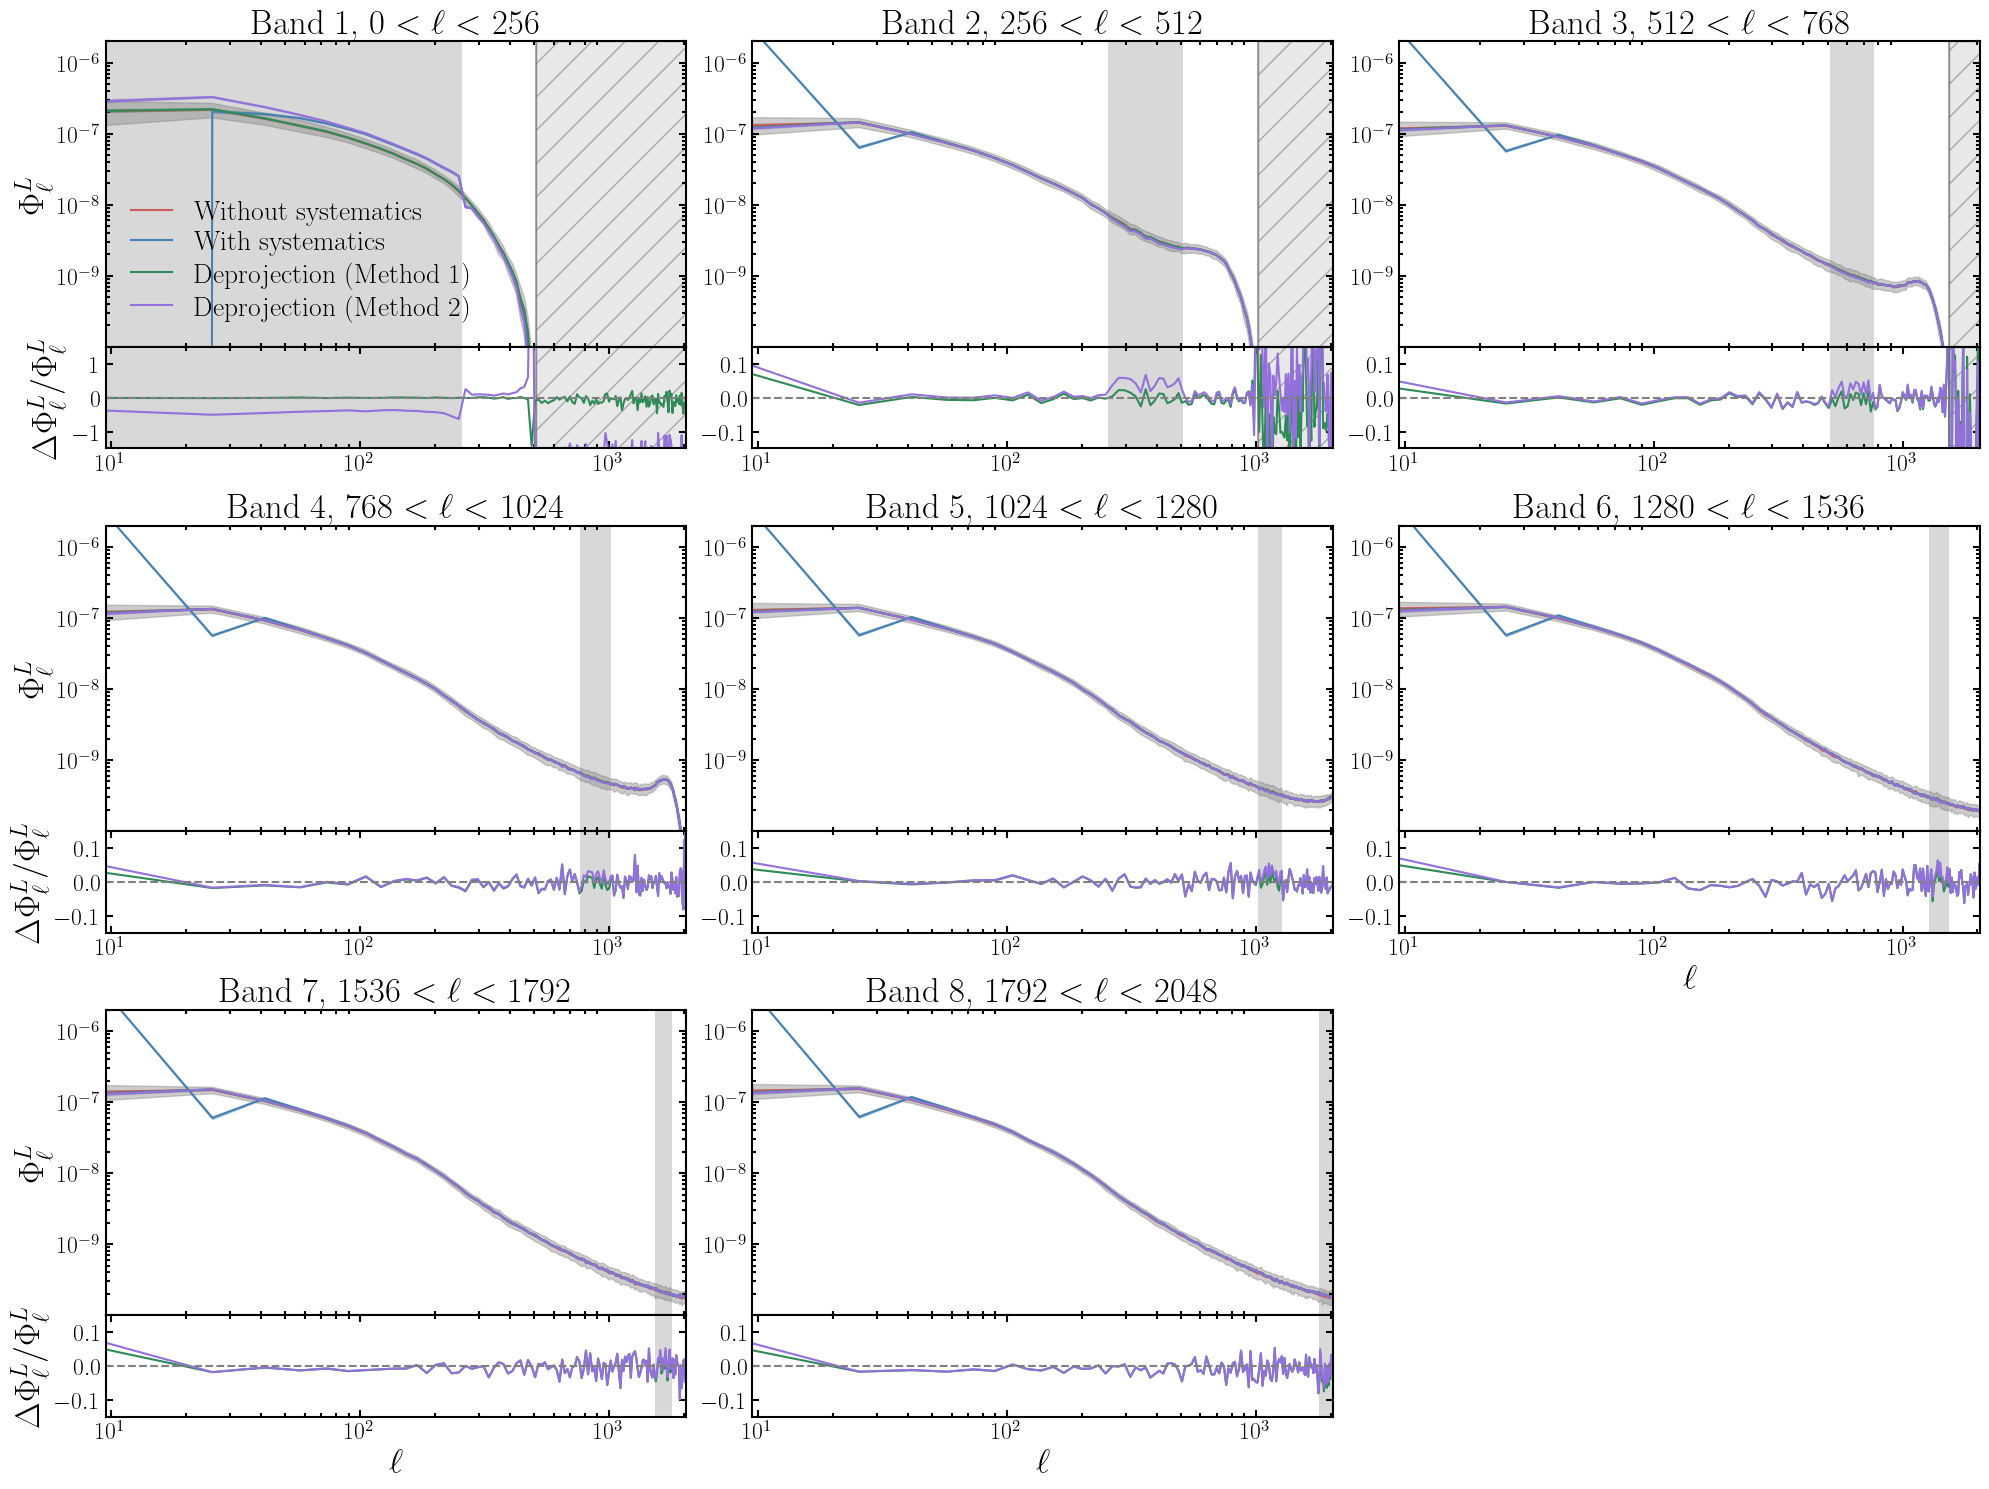

In [3]:

fsb = pd.read_csv(f'{path}mean_FSB.data')

ells = bins.get_effective_ells()

mask = hp.read_map(f'../maps_for_salmo/DECALS_mask.fits')

## workspace4
wsp = nmt.NmtWorkspace()
f = nmt.NmtField(mask, None, spin=0)
wsp.compute_coupling_matrix(f,f, bins)

#cls_theo = wsp.decouple_cell(wsp.couple_cell([cls_true]))[0]


fig = plt.figure(figsize=(20,15))
bands_grid = fig.add_gridspec(3,3)

## plot the fsb
i=0
for j in range(nbands):
    fsb1_mean = fsb[f'FSB_VD_bin{j}'].to_numpy()
    fsb0_mean = fsb[f'FSB_NoVD_bin{j}'].to_numpy()
    fsbD_mean = fsb[f'FSB_Deprojected_bin{j} 1'].to_numpy()
    fsbD2_mean = fsb[f'FSB_Deprojected_bin{j} 2'].to_numpy() 
    fsbD3_mean = fsb[f'FSB_Deprojected_bin{j} 3'].to_numpy() 
    fsb1_unc = fsb[f'FSB_VD_bin{j} unc'].to_numpy()
    fsb0_unc = fsb[f'FSB_NoVD_bin{j} unc'].to_numpy()
    fsbD_unc = fsb[f'FSB_Deprojected_bin{j} 1 unc'].to_numpy()
    fsbD2_unc = fsb[f'FSB_Deprojected_bin{j} 2 unc'].to_numpy()

    plots_grid = bands_grid[j//3, j%3].subgridspec(2,1,hspace=0, height_ratios=[3,1])
    axs = plots_grid.subplots()
    
    ## plot FSB
    axs[0].set_title(f'Band {j+1}, {j*dell} $< \\ell <$ {(j+1)*dell}', fontsize=25)
    axs[0].plot(ells, fsb0_mean, 'indianred', label='Without systematics')
    axs[0].plot(ells, fsb1_mean, 'steelblue', label='With systematics')
    axs[0].plot(ells, fsbD_mean, 'seagreen', label='Deprojection (Method 1)')
    axs[0].plot(ells, fsbD2_mean , 'mediumpurple', label='Deprojection (Method 2)')
   # axs[0].plot(ells, fsbD3_mean, 'mediumpurple', label='deproject last squared, filtered')
    #axs[0].plot(ells, fsbD3_mean, 'mediumpurple', label='deproject last simple')
    axs[0].fill_between(ells, fsb1_mean- fsb1_unc, fsb1_mean+ fsb1_unc, color='steelblue', alpha=0.4)
    axs[0].fill_between(ells, fsb0_mean- fsb0_unc, fsb0_mean+ fsb0_unc, color='indianred', alpha=0.4)
    axs[0].fill_between(ells, fsb0_mean- fsb0_unc*np.sqrt(Nsim), fsb0_mean+ fsb0_unc*np.sqrt(Nsim), color='grey', alpha=0.4)
    axs[0].fill_between(ells, fsbD_mean- fsbD_unc, fsbD_mean+ fsbD_unc, color='seagreen', alpha=0.4)
    axs[0].fill_between(ells, fsbD2_mean- fsbD2_unc, fsbD2_mean+ fsbD2_unc, color='mediumpurple', alpha=0.4)
    #axs[0].fill_between(ells, fsbD_mean- fsbD_unc, fsbD_mean+ fsbD_unc, color='seagreen', alpha=0.4)
    #ax1.plot(ell_arr, fsb0_arr[j][0], 'g--', label='SALMO (VD)')
    #ax1.plot(ell_arr, fsb1_arr[j][0], 'b--', label='SALMO (no VD)')
    axs[0].axvspan(j*dell, (j+1)*dell, facecolor='grey', alpha=0.3)
    axs[0].set_yscale('log')
    axs[0].set_xlim(ells[0],lmax_filts)
    axs[0].set_ylim(1e-10,2e-6)
    axs[0].set_yticks([1e-6, 1e-7, 1e-8, 1e-9])
    axs[0].set_xscale('log')


    ## plot relative deviation between declas and simulation
    devD = (fsb0_mean - fsbD_mean) / fsb0_mean
    devD2 = (fsb0_mean - fsbD2_mean) / fsb0_mean
    #devD2_filt = (fsb0_mean_filt - fsbD2_mean_filt) / fsb0_unc_filt
    devD3 = (fsb0_mean - fsbD3_mean) / fsb0_mean

    axs[1].plot(ells, devD, 'seagreen')
    axs[1].plot(ells, devD2, 'mediumpurple')
    #axs[1].plot(ells, devD3, 'mediumpurple')
    axs[1].axhline(ls='--', color='grey')
    #ax2.set_xscale('log')
    axs[1].axvspan(j*dell, (j+1)*dell, facecolor='grey', alpha=0.3)
    axs[1].set_ylim(-.15,.15)
    axs[1].set_yticks([-0.1,0,0.1])
    axs[1].set_xlim(ells[0],lmax_filts)
    if j == 0:
        axs[1].set_ylim(-1.5,1.5)
        axs[1].set_yticks([-1,0,1])
    #axs[1].fill_between(y1=-1, y2=1, x=ells, alpha=0.3, color='grey', edgecolor=None)
    #axs[1].fill_between(y1=-3, y2=3, x=ells, alpha=0.3, color='grey', edgecolor=None)
   # plt.savefig(f'{path}figs/FSB_SALMO_bin{j}')
    if j in [5,6,7]:
        axs[1].set_xlabel(f'$\\ell$', fontsize=25)
    axs[1].set_xscale('log')
    axs[0].get_xaxis().set_ticks([])

    axs[0].axvspan(2*(j+1)*dell, lmax_filts, hatch='/', ec='dimgrey', fc='lightgrey', alpha=0.5)
    axs[0].axvline(2*(j+1)*dell, color='dimgrey', alpha=0.5)
    axs[1].axvspan(2*(j+1)*dell, lmax_filts, hatch='/', ec='dimgrey', fc='lightgrey', alpha=0.5)
    axs[1].axvline(2*(j+1)*dell, color='dimgrey', alpha=0.5)
    
    if j in [0,3,6]:
        axs[0].set_ylabel(f'$\\Phi^L_\\ell$', fontsize=25)
        axs[1].set_ylabel('$\\Delta\\Phi^L_\\ell /\\Phi_\\ell^L$', fontsize=25)

    if j == 0:
        axs[0].legend(loc='lower left', frameon=False, fontsize=20)
plt.tight_layout()
if savefigs:
    plt.savefig(f'{pathFIGS}FSB.png')
plt.show()

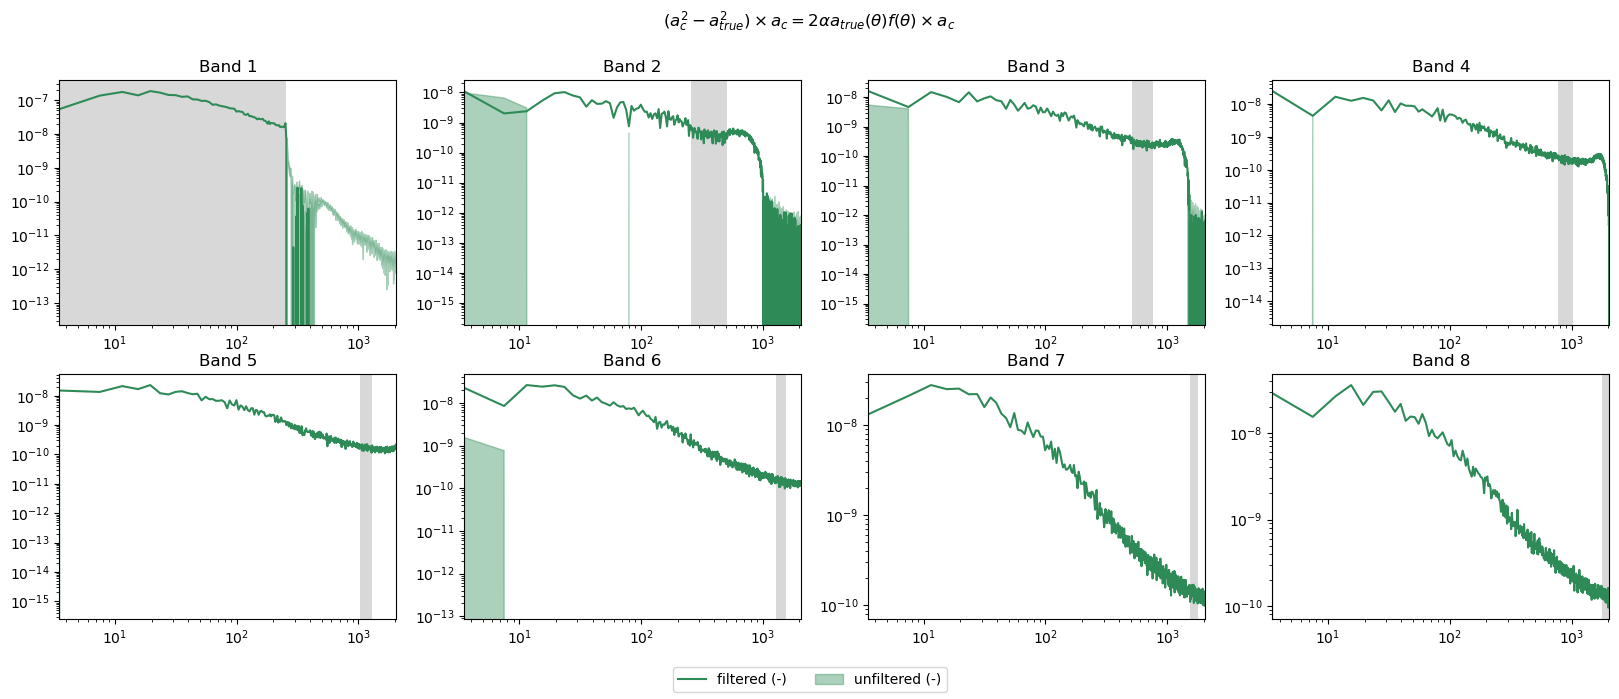

In [54]:
fig, axs1 = plt.subplots(2, 4, figsize=(20,7))
axs1 = axs1.flatten()

fig.suptitle('$(a_{c}^2-a_{true}^2)\\times a_c = 2\\alpha a_{true}(\\theta)f(\\theta)\\times a_c$')
for j in range(nbands):
    mfsb_unfilt = -results[f'(a_c^2 - a_true^2)xa_clean unfiltered bin{j}']
    mfsb_unc_unfilt = -results[f'(a_c^2 - a_true^2)xa_clean unfiltered bin{j} unc']
    fsb_unfilt = results[f'(a_c^2 - a_true^2)xa_clean unfiltered bin{j}']
    fsb_unc_unfilt = results[f'(a_c^2 - a_true^2)xa_clean unfiltered bin{j} unc']
    axs1[j].set_title(f'Band {j+1}')
    #axs1[j].plot(ells, fsb_filt, color='steelblue')
    #axs1[j].plot(ells, fsb_unfilt, color='seagreen')
    #axs1[j].fill_between(ells, fsb_filt- fsb_unc_filt, fsb_filt + fsb_unc_filt, color='steelblue', alpha=0.4)
    #axs1[j].fill_between(ells, fsb_unfilt- fsb_unc_unfilt, fsb_unfilt + fsb_unc_unfilt, color='seagreen', alpha=0.4)
    axs1[j].plot(ells, fsb_unfilt, color='seagreen')
    axs1[j].fill_between(ells, mfsb_unfilt- mfsb_unc_unfilt, mfsb_unfilt + mfsb_unc_unfilt, color='seagreen', alpha=0.4)
    axs1[j].set_yscale('log')
    axs1[j].set_xscale('log')
    axs1[j].axvspan(j*dell, (j+1)*dell, facecolor='grey', alpha=0.3)
    axs1[j].set_xlim(ells[0], lmax_filts)
fig.legend(labels=['filtered (-)','unfiltered (-)'], loc='lower center', ncol=2)

if savefigs:
    plt.savefig(f'{pathFIGS}mixed_term.png')
plt.show()

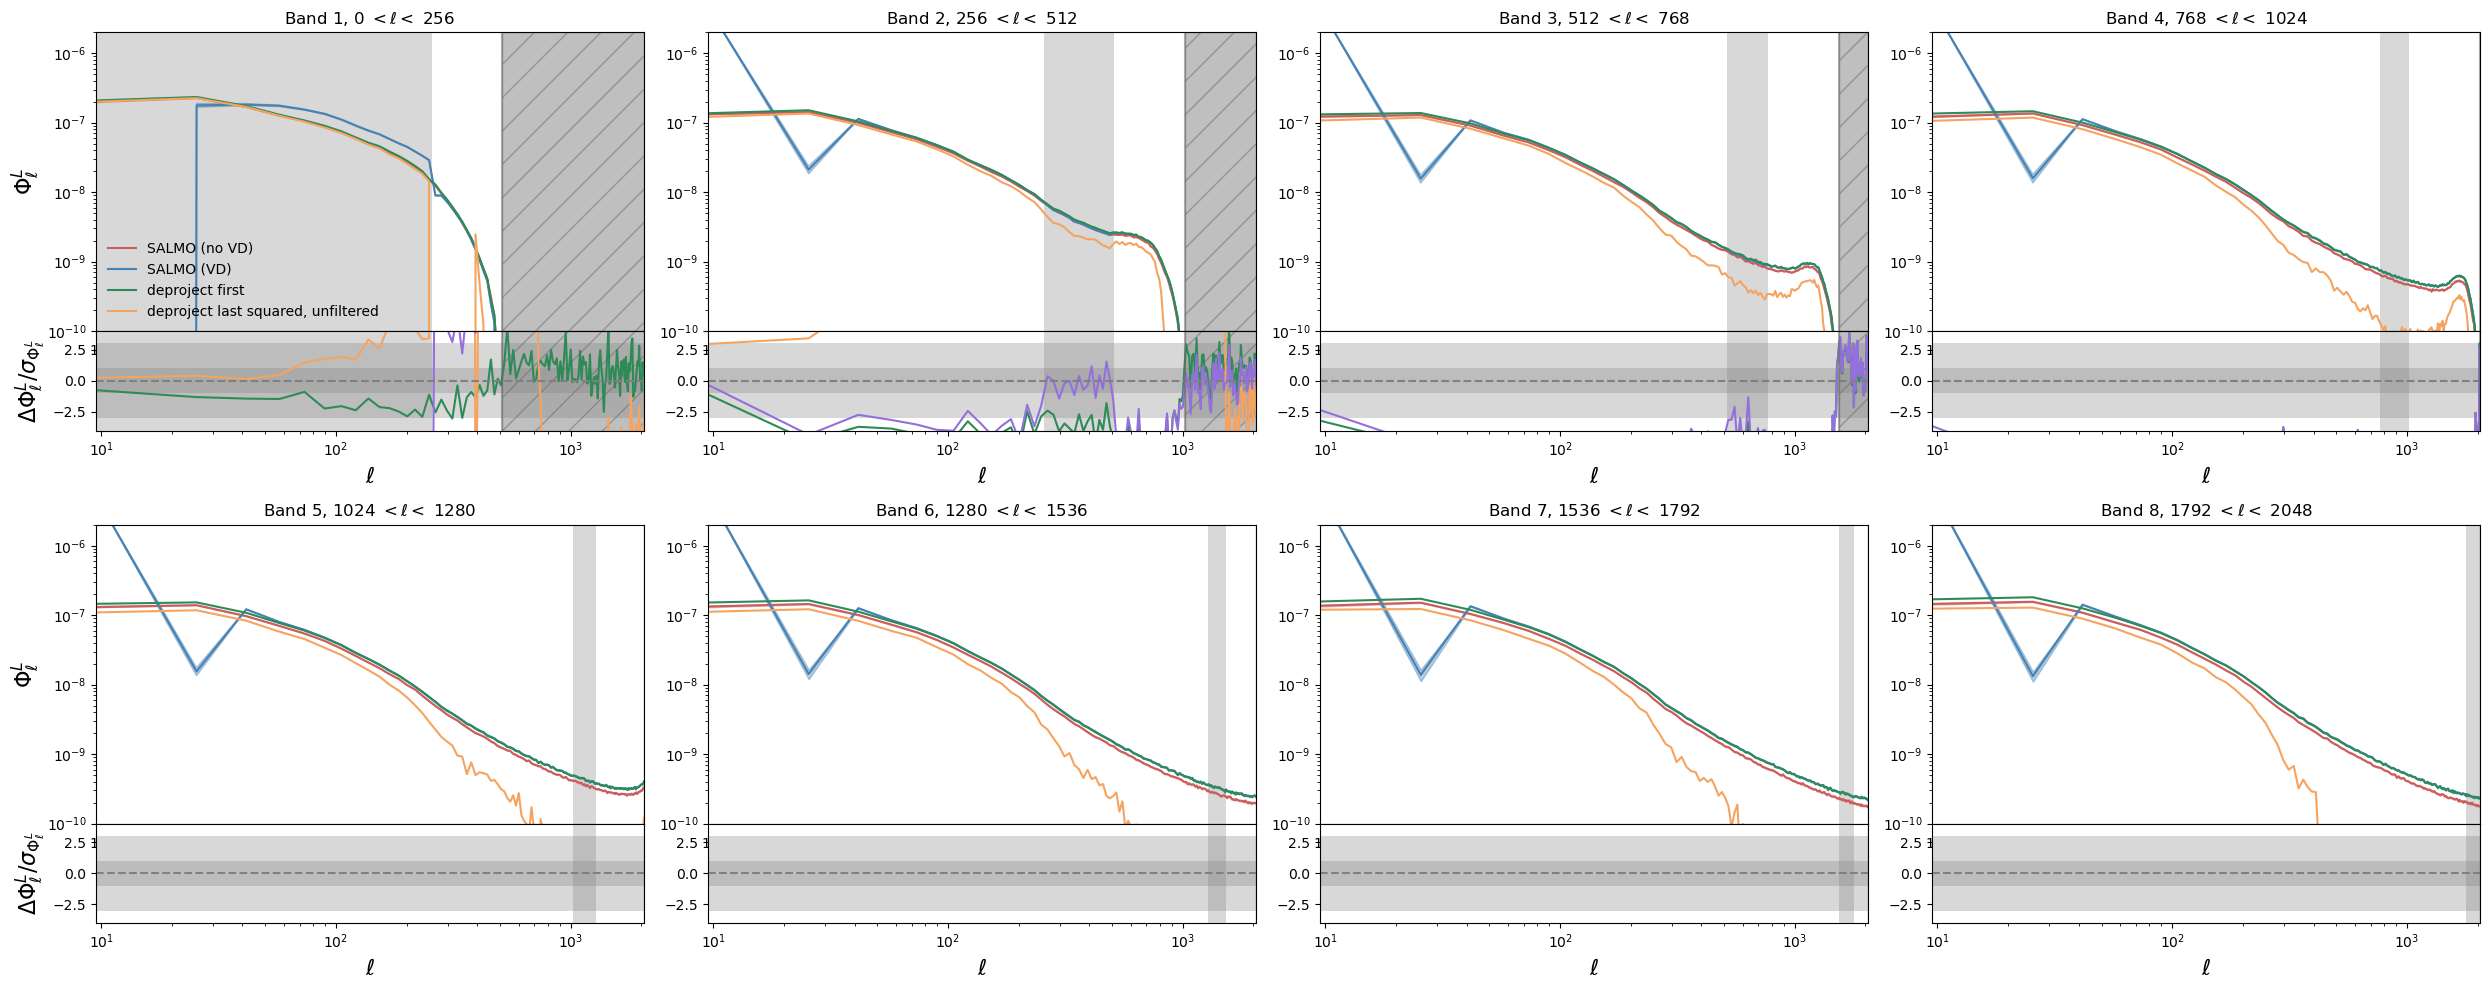

In [ ]:

fsb = pd.read_csv(f'{path}mean_FSB.data')

ells = bins.get_effective_ells()

mask = hp.read_map(f'../maps_for_salmo/DECALS_mask.fits')

## workspace4
wsp = nmt.NmtWorkspace()
f = nmt.NmtField(mask, None, spin=0)
wsp.compute_coupling_matrix(f,f, bins)

#cls_theo = wsp.decouple_cell(wsp.couple_cell([cls_true]))[0]


fig = plt.figure(figsize=(25,10))
bands_grid = fig.add_gridspec(2,4)

## plot the fsb
i=0
for j in range(nbands):
    fsb1_mean = fsb[f'FSB_VD_bin{j}'].to_numpy()
    fsb0_mean = fsb[f'FSB_NoVD_bin{j}'].to_numpy()
    fsbD_mean = fsb[f'FSB_Deprojected_bin{j} 1'].to_numpy()
    fsbD2_mean = fsb[f'FSB_Deprojected_bin{j} 2'].to_numpy() - results[f'(a_c^2 - a_true^2)xa_clean unfiltered bin{j}'].to_numpy()
    fsbD3_mean = fsb[f'FSB_Deprojected_bin{j} 3'].to_numpy() 
    fsb1_unc = fsb[f'FSB_VD_bin{j} unc'].to_numpy()
    fsb0_unc = fsb[f'FSB_NoVD_bin{j} unc'].to_numpy()
    fsbD_unc = fsb[f'FSB_Deprojected_bin{j} 1 unc'].to_numpy()
    fsbD2_unc = fsb[f'FSB_Deprojected_bin{j} 2 unc'].to_numpy()
    fsbD3_unc = fsb[f'FSB_Deprojected_bin{j} 3 unc'].to_numpy()

    plots_grid = bands_grid[j//4, j%4].subgridspec(2,1,hspace=0, height_ratios=[3,1])
    axs = plots_grid.subplots()
    
    ## plot FSB
    axs[0].set_title(f'Band {j+1}, {j*dell} $< \\ell <$ {(j+1)*dell}')
    axs[0].plot(ells, fsb0_mean, 'indianred', label='SALMO (no VD)')
    axs[0].plot(ells, fsb1_mean, 'steelblue', label='SALMO (VD)')
    axs[0].plot(ells, fsbD_mean, 'seagreen', label='deproject first')
    axs[0].plot(ells, fsbD2_mean , 'sandybrown', label='deproject last squared, unfiltered') 
    #axs[0].plot(ells, fsbD3_mean, 'mediumpurple', label='deproject last simple')
    axs[0].fill_between(ells, fsb1_mean- fsb1_unc, fsb1_mean+ fsb1_unc, color='steelblue', alpha=0.4)
    axs[0].fill_between(ells, fsb0_mean- fsb0_unc, fsb0_mean+ fsb0_unc, color='indianred', alpha=0.4)
    #axs[0].fill_between(ells, fsbD_mean- fsbD_unc, fsbD_mean+ fsbD_unc, color='seagreen', alpha=0.4)
    #ax1.plot(ell_arr, fsb0_arr[j][0], 'g--', label='SALMO (VD)')
    #ax1.plot(ell_arr, fsb1_arr[j][0], 'b--', label='SALMO (no VD)')r
    axs[0].axvspan(j*dell, (j+1)*dell, facecolor='grey', alpha=0.3)
    axs[0].set_yscale('log')
    axs[0].set_xlim(ells[0],lmax_filts)
    axs[0].set_ylim(1e-10,2e-6)
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')


    ## plot relative deviation between declas and simulation
    devD = (fsb0_mean - fsbD_mean) / fsb0_unc
    devD2 = (fsb0_mean - fsbD2_mean) / fsb0_unc
    #devD2_filt = (fsb0_mean_filt - fsbD2_mean_filt) / fsb0_unc_filt
    devD3 = (fsb0_mean - fsbD3_mean) / fsb0_unc

    axs[1].plot(ells, devD, 'seagreen')
    axs[1].plot(ells, devD2, 'sandybrown')
    axs[1].plot(ells, devD3, 'mediumpurple')
    axs[1].axhline(ls='--', color='grey')
    #ax2.set_xscale('log')
    axs[1].axvspan(j*dell, (j+1)*dell, facecolor='grey', alpha=0.3)
    axs[1].set_ylim(-4,4)
    axs[1].fill_between(y1=-1, y2=1, x=ells, alpha=0.3, color='grey', edgecolor=None)
    axs[1].fill_between(y1=-3, y2=3, x=ells, alpha=0.3, color='grey', edgecolor=None)
   # plt.savefig(f'{path}figs/FSB_SALMO_bin{j}')

    axs[1].set_xlabel(f'$\\ell$', fontsize=16)
    axs[1].set_xscale('log')
    axs[1].set_xlim(ells[0], 2*nside)

    axs[0].axvspan(2*(j+1)*dell, lmax_filts, hatch='/', ec='dimgrey', fc='grey', alpha=0.5)
    axs[0].axvline(2*(j+1)*dell, color='dimgrey', alpha=0.5)
    axs[1].axvspan(2*(j+1)*dell, lmax_filts, hatch='/', ec='dimgrey', fc='grey', alpha=0.5)
    axs[1].axvline(2*(j+1)*dell, color='dimgrey', alpha=0.5)
    
    if j in [0,4]:
        axs[0].set_ylabel(f'$\\Phi^L_\\ell$', fontsize=16)
        axs[1].set_ylabel('$\\Delta\\Phi^L_\\ell /\\sigma_{\\Phi_\\ell^L}$', fontsize=16)

    if j == 0:
        axs[0].legend(loc='lower left', frameon=False)
plt.tight_layout()
if savefigs:
    plt.savefig(f'{pathFIGS}FSB.png')
plt.show()

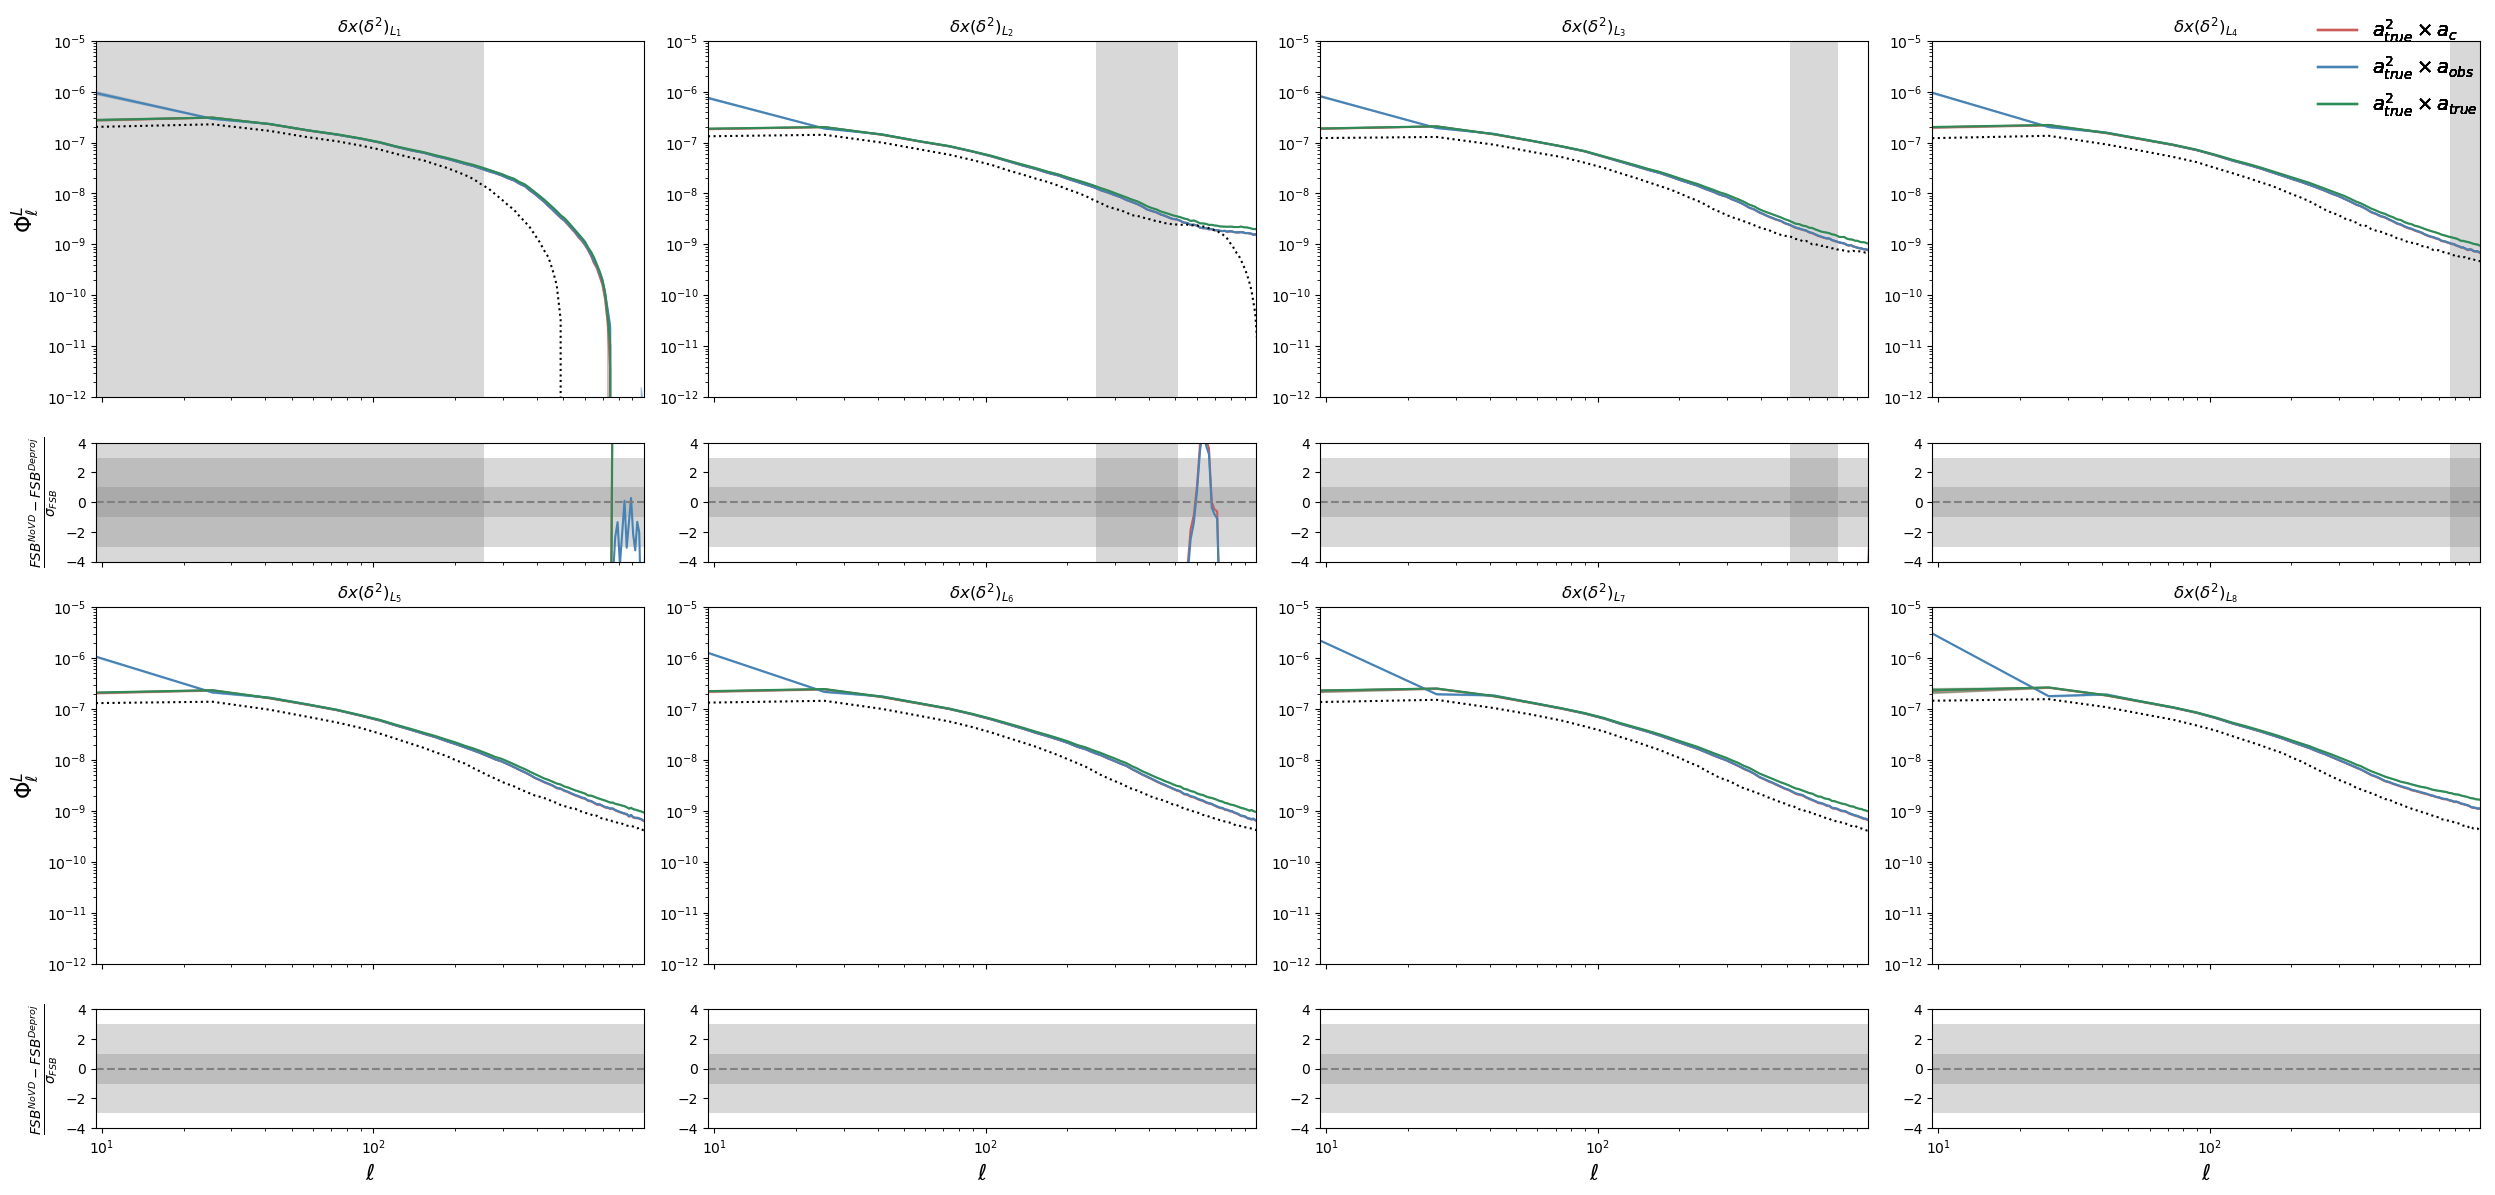

In [ ]:
if nbands <= 8:
    fig, axs = plt.subplots(4, 4, height_ratios=[3,1,3,1], figsize=(25,12), sharex=True)
axs = axs.flatten()
## plot the fsb
i=0
for j in range(nbands):
    atrue2xac = results[f'a_true^2xa_clean unfiltered bin{j}'].to_numpy()
    atrue2xaobs = results[f'a_true^2xa_obs unfiltered bin{j}'].to_numpy()
    atrue2xatrue = results[f'a_true^2xa_true unfiltered bin{j}'].to_numpy()
    atrue2xac_unc = results[f'a_true^2xa_clean unfiltered bin{j} unc'].to_numpy()
    atrue2xaobs_unc = results[f'a_true^2xa_obs unfiltered bin{j} unc'].to_numpy()
    atrue2xatrue_unc = results[f'a_true^2xa_true unfiltered bin{j} unc'].to_numpy()
    
    fsb0_mean = fsb[f'FSB_NoVD_bin{j}'].to_numpy()
    fsb0_unc = fsb[f'FSB_NoVD_bin{j} unc'].to_numpy()


    ## plot FSB
    axs[i].set_title(f'$\\delta x (\\delta^2)_{{L_{j+1}}}$')
    axs[i].plot(ells, atrue2xac, 'indianred', label='SALMO (no VD)')
    axs[i].plot(ells, atrue2xaobs, 'steelblue', label='SALMO (VD)')
    axs[i].plot(ells, atrue2xatrue, 'seagreen', label='deproject first')
    axs[i].plot(ells, fsb0_mean, 'black', linestyle='dotted', label='deproject first')
    axs[i].fill_between(ells, atrue2xac- atrue2xac_unc, atrue2xac+ atrue2xac_unc, color='indianred', alpha=0.4)
    axs[i].fill_between(ells, atrue2xaobs - atrue2xaobs_unc, atrue2xaobs + atrue2xaobs_unc, color='steelblue', alpha=0.4)
    axs[i].fill_between(ells, atrue2xatrue - atrue2xatrue_unc, atrue2xatrue + atrue2xatrue_unc, color='seagreen', alpha=0.4)
    axs[i].axvspan(j*dell, (j+1)*dell, facecolor='grey', alpha=0.3)
    axs[i].set_yscale('log')
    fig.legend(labels = ['$a_{true}^2\\times a_c$', '$a_{true}^2\\times a_{obs}$', '$a_{true}^2\\times a_{true}$'], loc='upper right', frameon=False, fontsize=14)
    axs[j].set_xlim(ells[0], lmax_filts)
    axs[i].set_ylim(1e-12,1e-5)
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')


    ## plot relative deviation between declas and simulation
    devD = (fsb0_mean - atrue2xac) / fsb0_unc
    devD2 = (fsb0_mean - atrue2xaobs) / fsb0_unc
    devD3 = (fsb0_mean - atrue2xatrue) / fsb0_unc

    axs[i+4].plot(ells, devD, 'indianred')
    axs[i+4].plot(ells, devD2, 'steelblue')
    axs[i+4].plot(ells, devD3, 'seagreen')
    #axs[i+4].plot(ells, devD3, 'mediumpurple')
    axs[i+4].axhline(ls='--', color='grey')
    #ax2.set_xscale('log')
    axs[i+4].axvspan(j*dell, (j+1)*dell, facecolor='grey', alpha=0.3)
    axs[i+4].set_ylim(-4,4)
    axs[j].set_xlim(ells[0], lmax_filts)
    axs[i+4].fill_between(y1=-1, y2=1, x=ells, alpha=0.3, color='grey', edgecolor=None)
    axs[i+4].fill_between(y1=-3, y2=3, x=ells, alpha=0.3, color='grey', edgecolor=None)
    axs[j].set_xlim(ells[0], lmax_filts)
   # plt.savefig(f'{path}figs/FSB_SALMO_bin{j}')

    if (i+7)%10 == 0:
        i += 5
    else:
        i += 1

for i in [0,8]:
    axs[i].set_ylabel(f'$\\Phi^L_\\ell$', fontsize=16)
    axs[i+4].set_ylabel('$\\frac{FSB^{No VD} - FSB^{Deproj}}{\\sigma_{FSB}}$', fontsize=14)

for i in [1,2,3,4]:
    axs[-i].set_xlabel(f'$\\ell$', fontsize=16)
plt.tight_layout()
if savefigs:
    plt.savefig(f'{pathFIGS}/atrue2cross.png')
plt.show()